In [1]:
from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import mglearn
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

sns.set()

train = pd.read_csv('C:/Users/ddtthh/Desktop/namhyo/8358_1.csv')
train.head()



,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [2]:
train.shape

(3510, 21)

In [3]:
train.info() # menupageurl, menus.description, postalCode누락


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 21 columns):
id                    3510 non-null object
address               3510 non-null object
categories            3510 non-null object
city                  3510 non-null object
country               3510 non-null object
keys                  3510 non-null object
latitude              3510 non-null float64
longitude             3510 non-null float64
menuPageURL           610 non-null object
menus.amountMax       2948 non-null float64
menus.amountMin       2948 non-null float64
menus.currency        2951 non-null object
menus.dateSeen        3510 non-null object
menus.description     1526 non-null object
menus.name            3510 non-null object
name                  3510 non-null object
postalCode            3484 non-null object
priceRangeCurrency    1557 non-null object
priceRangeMin         1557 non-null float64
priceRangeMax         1557 non-null float64
province              3510 n

In [4]:
train.isnull().sum()#누락된 항목 확인 가능

id                       0
address                  0
categories               0
city                     0
country                  0
keys                     0
latitude                 0
longitude                0
menuPageURL           2900
menus.amountMax        562
menus.amountMin        562
menus.currency         559
menus.dateSeen           0
menus.description     1984
menus.name               0
name                     0
postalCode              26
priceRangeCurrency    1953
priceRangeMin         1953
priceRangeMax         1953
province                 0
dtype: int64

In [5]:
train['menus.amountMax'].fillna(train.groupby("menus.name")["menus.amountMax"].transform("median"),inplace=True)
train['menus.amountMin'].fillna(train.groupby("menus.name")["menus.amountMin"].transform("median"),inplace=True)

In [6]:
#train['postalCode'].fillna(train.groupby("menus.name")["postalCode"])
#train['menuPageURL'].fillna(train.groupby("categories")['menuPageURL'])
train['menus.currency'] = train['menus.currency'].fillna('USD') # 미국에서만 사용하니 화폐 가치는 USD로 통일한다
#train.isnull().sum()#누락된 항목 확인 가능
# 이래도 224개가 남는다 그래서 둘의 차로 구해야한다


In [7]:

train[['name','menus.name','menus.amountMax']][train['menus.amountMax']==train['menus.amountMax'].max()] # 가격의 최댓값
train[['name','menus.name','menus.amountMin']][train['menus.amountMin']==train['menus.amountMin'][train['menus.amountMin'].gt(0)].min()] # 가격의 최댓값
print(train[train['menus.name']=='Cheese Pizza']['menus.name'].value_counts())


Cheese Pizza    136
Name: menus.name, dtype: int64


In [8]:
train['name'].value_counts()

Sicilia's Pizzeria                96
J & G Restaurant                  55
Casey's General Store             43
The Pizza Joint                   36
North End Pizzeria                34
Labella Pizza and Pasta           31
Giovanni's Pizzeria               30
Nino's Trattoria & Pizzeria       28
Papa John's Pizza                 27
Marco's Pizza                     26
Takka Grill                       26
Stone and Paddle                  24
Hungry Howie's Pizza              22
Original Giorgio's                20
Palace Pizza Bartow               20
Pronto Pizza                      19
Bertucci's                        19
Hungry Hoiwes Pizza & Subs        18
Pizza Inn                         18
7 Day 24 Hours Emergency Locks    18
Valentino Pizza I                 18
Ameci Pizza & Pasta               18
Nonna's Pizza                     17
Mellow Mushroom Pizza Bakers      17
Louie's Famous Pizza              17
Sal Vito Pizza                    17
Gattitown                         17
K

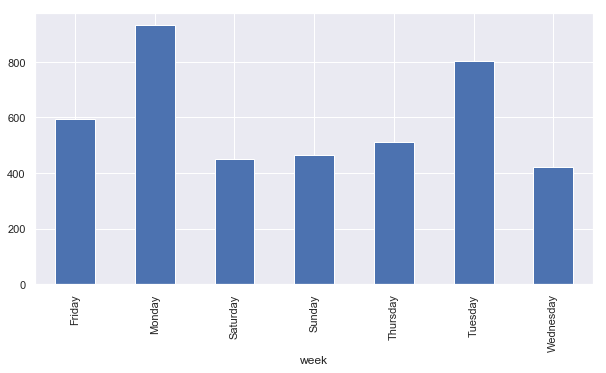

In [9]:
# 요일별 얼마나 피자를 먹었는가
df = pd.DataFrame(train['menus.dateSeen'].values,columns=['date'])
df = df['date'].str.split(',',expand=True).stack().reset_index(level=1,drop=True)
df = df.to_frame('date').set_index(df.groupby(df.index).cumcount(),append=True)
df['date'] = df['date'].str[:10]#T이후로는 의미가없음
df['date'] = pd.to_datetime(df['date']) #datetime형식으로 변환
df['week'] = df['date'].dt.day_name()

df.groupby('week').size().plot(kind='bar',stacked=True,figsize=(10,5))
#week_pizza = df.groupby('week').size().to_frame('week_pizza').reset_index()
#week_pizza.sort_values(['week_pizza'],ascending=False)

In [10]:
train.groupby('menus.name')['postalCode'].value_counts()

menus.name                                         postalCode
1 Ingredient Pizza                                 41101         1
                                                   8081          1
1 Item Pizza                                       2842          1
                                                   6516          1
1 Large 1 Topping Pizza                            78501         1
1 Large 1, Topping Pizza                           34266         2
1 Large Cheese Pizza                               34266         2
1 Medium 1, Topping Pizza                          34266         2
1 Pizza With 2 Toppings                            34266         1
1 Pizza With The Works                             34266         1
1 Topping Mozzarella Pizza                         6513          1
1 Topping Pizza                                    34266         2
                                                   76248         2
                                                   94063         1


In [11]:
#df2 = train.groupby("categories")["menuPageURL"]


#for dataset in 
#traim[train["categories"]==
#train['menuPageURL'].fillna(train.groupby("categories")['menuPageURL'])

In [12]:
#탑 10 피자 메뉴 
pizza = train.drop_duplicates(subset=['address','menus.name','name']) #중복된 행 제거
pizza = pizza.groupby("menus.name").size().to_frame('pizza_count').reset_index()
pizza.sort_values(['pizza_count'],ascending=False)[:10]

,menus.name,pizza_count
252,Cheese Pizza,130
1552,White Pizza,74
885,Pizza,62
671,Margherita Pizza,60
547,Hawaiian Pizza,53
937,Pizza Burger,49
186,Buffalo Chicken Pizza,44
829,Pepperoni Pizza,41
124,Bbq Chicken Pizza,38
1521,Veggie Pizza,34


In [13]:
# 탑 10 레스토랑 
pizza = train.drop_duplicates(subset=['address','menus.name','name']) #중복된 행 제거
pizza_name_df_count= pizza.groupby(['name']).size().to_frame('count').reset_index()
pizza_name_df_count.sort_values(by='count', ascending=False)[:10]

,name,count
732,Sicilia's Pizzeria,64
371,J & G Restaurant,55
162,Casey's General Store,37
832,The Pizza Joint,36
428,Labella Pizza and Pasta,31
318,Giovanni's Pizzeria,28
603,Papa John's Pizza,27
774,Takka Grill,26
569,North End Pizzeria,25
356,Hungry Howie's Pizza,22


In [14]:
# 탑 10 도시 이름
pizza = train.drop_duplicates(subset=['address','menus.name','name']) #중복된 행 제거
pizza_city = pizza.groupby(['city']).size().to_frame('count').reset_index()
pizza_city.sort_values(by='count',ascending=False)[:10]

,city,count
466,Philadelphia,91
416,New York,85
163,East Granby,55
335,Los Angeles,51
126,Columbus,41
98,Charleston,41
634,Weirton,32
118,Clifton Park,31
650,White Plains,29
513,Rockville,25


In [15]:
state_count= train.groupby(['province']).size().to_frame('count').reset_index()
state_count.sort_values(by='count', ascending=False)[:20]

,province,count
28,CA,256
160,NJ,187
70,FL,168
184,PA,166
109,IL,150
163,NY,124
176,OH,122
242,TX,117
125,MA,104
258,WV,100


In [16]:

train['latitude'] = train['latitude'].astype(str)
train['longitude'] = train['longitude'].astype(str)
train['altitude'] = train[['latitude','longitude']].apply(lambda x: ', '.join(x),axis=1)
train['altitude'][:5]

0           44.10266476, -121.3007971
1           44.10266476, -121.3007971
2    34.06456347, -118.46901729999999
3    34.06456347, -118.46901729999999
4    34.06456347, -118.46901729999999
Name: altitude, dtype: object

In [17]:
pizza_altitude = train.groupby(['altitude']).size().to_frame('frequency').reset_index()
pizza_altitude



,altitude,frequency
0,"18.411826, -66.02487099999999",1
1,"20.02133, -155.67396399999998",4
2,"21.271709, -157.77395",1
3,"21.279272, -157.829139",5
4,"21.28290985, -157.8374614",4
5,"21.287633, -157.80806",1
6,"25.768853, -80.35996899999999",1
7,"25.789053, -80.13011800000001",2
8,"25.81385, -80.130264",9
9,"25.814238, -80.19126",1


In [18]:
train.drop_duplicates(subset=['city','latitude','longitude','altitude'],keep='first',inplace=True)
pizza_city = train[['name','city','latitude','longitude','altitude']]
pizza_city

,name,city,latitude,longitude,altitude
0,Little Pizza Paradise,Bend,44.10266476,-121.3007971,"44.10266476, -121.3007971"
2,The Brentwood,Los Angeles,34.06456347,-118.46901729999999,"34.06456347, -118.46901729999999"
7,Bravo Pizza Hollywood,Los Angeles,34.1017424,-118.30197290000001,"34.1017424, -118.30197290000001"
13,Lucky's Pub,Houston,29.75247947,-95.35416442,"29.75247947, -95.35416442"
14,Roadhouse Cafe,Hyannis,41.64827787,-70.29134463,"41.64827787, -70.29134463"
16,Brigham Young University,Provo,40.25083927,-111.64926770000001,"40.25083927, -111.64926770000001"
20,Luke's Locker,Spring,30.16413,-95.46235,"30.16413, -95.46235"
21,Francesca's On Chestnut,Chicago,41.89854289,-87.6219955,"41.89854289, -87.6219955"
25,Country Bagel Bakery,West Chester,39.961929999999995,-75.60276,"39.961929999999995, -75.60276"
32,Buca Di Beppo - San Jose - Oakridge,San Jose,37.250458,-121.86341499999999,"37.250458, -121.86341499999999"


In [19]:
#merge를 통해 city랑 altitude의 공통적인 부분들중 on을 altitude로해서 altitude필드를 공통적인 열값으로 갖고, how=left를 통해 city를 기준으로 같은게 나오면  altitude 필드를 추가한다
# 만약 altitude테이블의 값이 없으면 Nan으로해서 추가한다
pizza_arranged = pd.merge(pizza_city,pizza_altitude,on='altitude',how='left')
pizza_arranged

,name,city,latitude,longitude,altitude,frequency
0,Little Pizza Paradise,Bend,44.10266476,-121.3007971,"44.10266476, -121.3007971",2
1,The Brentwood,Los Angeles,34.06456347,-118.46901729999999,"34.06456347, -118.46901729999999",5
2,Bravo Pizza Hollywood,Los Angeles,34.1017424,-118.30197290000001,"34.1017424, -118.30197290000001",6
3,Lucky's Pub,Houston,29.75247947,-95.35416442,"29.75247947, -95.35416442",1
4,Roadhouse Cafe,Hyannis,41.64827787,-70.29134463,"41.64827787, -70.29134463",2
5,Brigham Young University,Provo,40.25083927,-111.64926770000001,"40.25083927, -111.64926770000001",4
6,Luke's Locker,Spring,30.16413,-95.46235,"30.16413, -95.46235",1
7,Francesca's On Chestnut,Chicago,41.89854289,-87.6219955,"41.89854289, -87.6219955",4
8,Country Bagel Bakery,West Chester,39.961929999999995,-75.60276,"39.961929999999995, -75.60276",7
9,Buca Di Beppo - San Jose - Oakridge,San Jose,37.250458,-121.86341499999999,"37.250458, -121.86341499999999",1


In [20]:
import plotly.offline as py
import plotly.graph_objects as go

#위도 기준 피자 먹은 회숫
pizza_arranged['text'] = pizza_arranged['name'] + ', ' + pizza_arranged['city'] + ', ' + 'total pizza types : '+ pizza_arranged['frequency'].astype(str)
data = [dict(
        type = 'scattergeo',
        lon = pizza_arranged['longitude'],
        lat = pizza_arranged['latitude'],
        text = pizza_arranged['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            color = pizza_arranged['frequency'],
            cmax = pizza_arranged['frequency'].max(),
            colorbar_title="Pizza Frequency"
        ))]
layout = dict(
        title = 'Pizza distribution in USA<br>(Hover for pizza details)',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
py.init_notebook_mode(connected=True)
fig = dict(data=data, layout= layout)
py.iplot(fig, filename='Pizza_USA.html')

In [21]:

scl = [[0.0, 'rgb(248,255,206)'],[0.2, 'rgb(203,255,205)'],[0.4, 'rgb(155,255,164)'], [0.6, 'rgb(79,255,178)'],[0.8, 'rgb(15,183,132)'], [1, '#008059']]
data = [dict(
        type = 'choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_count.province,
        z= state_count['count'],
        locationmode= 'USA-states',
        marker = dict(
            line = dict(
                width=2,
                color='rgb(255, 255, 255)'
            )),
            colorbar = dict(
                title="Pizza Frequency")
        )]
layout = dict(
        title = 'Pizza distribution in USA<br>(Hover for pizza details)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa'),
            showlakes = True,
            lakecolor = 'rgb(255,255,255)'
        ),
    )
py.init_notebook_mode(connected=True)
fig = dict(data=data, layout= layout)
py.iplot(fig, filename='d3-chloropleth-map')


In [24]:
state_count.province

0                           AK
1                           AL
2                           AR
3                           AZ
4               Alt De Berwind
5                   Arco-plaza
6                       Arnold
7                          Atl
8                       Bamboo
9                       Bammel
10              Baxter Estates
11                  Bellefonte
12                      Bengal
13                Bicentennial
14                Bloomfld Hls
15         Bloomington Heights
16           Bloomington Hills
17                 Blue Anchor
18                   Bonney Lk
19              Bouquet Canyon
20                Brandtsville
21                   Brentwood
22              Briarcliff Mnr
23                   Brownhelm
24             Brownsboro Farm
25              Brownstown Twp
26         Bunker Hill Village
27               Burlngtn City
28                          CA
29                          CO
                ...           
251                 Valleyview
252     